In [35]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
input_file = "/root/AAI-540_Predictive-Maintenance-for-Pharmaceutical-Manufacturing-Equipment/predictive_maintenance_dataset.csv"

# Load the dataset
data = pd.read_csv(input_file)

# Display the first few rows of the dataset
data.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3



Initial Class Distribution:
failure
0    124388
1       106
Name: count, dtype: int64

Resampled Class Distribution:
failure
0    124388
1    124388
Name: count, dtype: int64

First few rows of the resampled dataset:
       date    device  failure    metric1  metric2  metric3  metric4  metric5  \
0  1/1/2015  S1F01085        0  215630672       55        0       52        6   
1  1/1/2015  S1F0166B        0   61370680        0        3        0        6   
2  1/1/2015  S1F01E6Y        0  173295968        0        0        0       12   
3  1/1/2015  S1F01JE0        0   79694024        0        0        0        6   
4  1/1/2015  S1F01R2B        0  135970480        0        0        0       15   

   metric6  metric7  metric8  metric9  
0   407438        0        0        7  
1   403174        0        0        0  
2   237394        0        0        0  
3   410186        0        0        0  
4   313173        0        0        3  


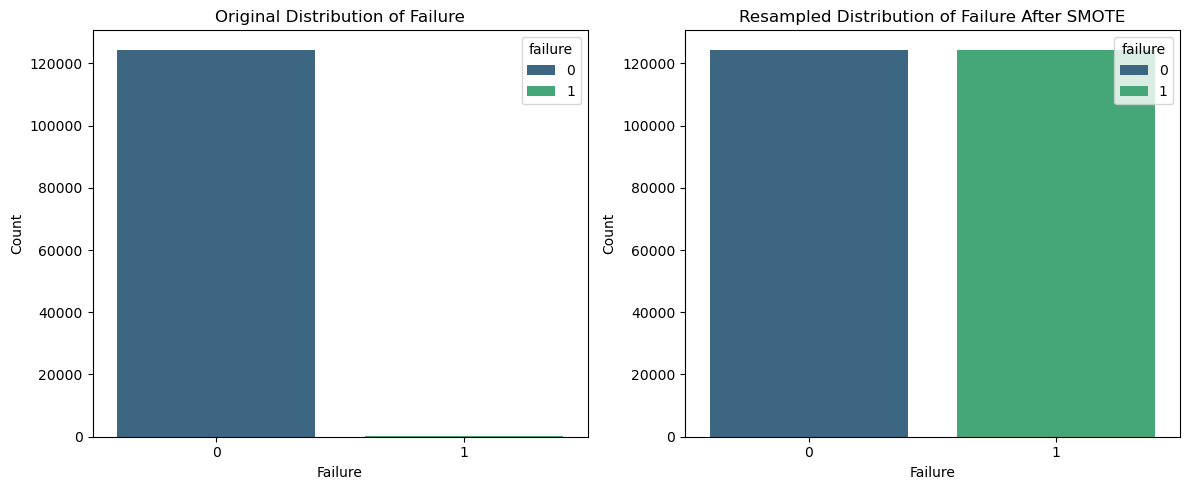


Resampled dataset saved to /root/AAI-540_Predictive-Maintenance-for-Pharmaceutical-Manufacturing-Equipment/resampled_predictive_maintenance_dataset.csv


In [37]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
input_file = "/root/AAI-540_Predictive-Maintenance-for-Pharmaceutical-Manufacturing-Equipment/predictive_maintenance_dataset.csv"
output_file = "/root/AAI-540_Predictive-Maintenance-for-Pharmaceutical-Manufacturing-Equipment/resampled_predictive_maintenance_dataset.csv"

### Pre-processing ###
# Load the original dataset
df = pd.read_csv(input_file)

# Store the original 'date' and 'device' columns
date_col = df['date']
device_col = df['device']

# Convert 'date' column to numerical components (year, month, day)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop(['failure', 'date'], axis=1)
y = df['failure']

# Display initial class distribution
print("\nInitial Class Distribution:")
print(y.value_counts())

### SMOTE Application ###
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Adjust the 'date' and 'device' columns to match resampled count
resampled_count = len(X_resampled) - len(X)
additional_dates = date_col.sample(n=resampled_count, replace=True, random_state=42)
full_dates = pd.concat([date_col, additional_dates], ignore_index=True)

additional_devices = device_col.sample(n=resampled_count, replace=True, random_state=42)
full_devices = pd.concat([device_col, additional_devices], ignore_index=True)

# Add the 'date' and 'device' columns back to the resampled dataset
X_resampled['date'] = full_dates
X_resampled['device'] = full_devices

# Combine features and target into a single DataFrame
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

# Reorder columns to put 'date' at the first position
cols = resampled_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('date')))
resampled_df = resampled_df[cols]

# Move 'failure' to the third column position
cols = resampled_df.columns.tolist()
cols.insert(2, cols.pop(cols.index('failure')))
resampled_df = resampled_df[cols]

# Drop 'year', 'month', and 'day' columns
resampled_df = resampled_df.drop(['year', 'month', 'day'], axis=1)

# Save the resampled dataset
resampled_df.to_csv(output_file, index=False)

# Display resampled class distribution
print("\nResampled Class Distribution:")
print(y_resampled.value_counts())

# Display the first few rows of the resampled dataset
print("\nFirst few rows of the resampled dataset:")
print(resampled_df.head())

### Visualization ###
# Plot the original distribution of the target variable
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y, hue=y, palette='viridis')
plt.title('Original Distribution of Failure')
plt.xlabel('Failure')
plt.ylabel('Count')

# Plot the resampled distribution of the target variable
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, hue=y_resampled, palette='viridis')
plt.title('Resampled Distribution of Failure After SMOTE')
plt.xlabel('Failure')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print(f"\nResampled dataset saved to {output_file}")


### Plot Description

Distribution of the target variable, **failure**, before and after applying SMOTE (Synthetic Minority Oversampling Technique):

1. **Original Distribution of Failure**:
   - The left plot shows the original distribution of the **failure** variable in the dataset.
   - It highlights a significant class imbalance, where the majority class (non-failures, represented as 0) dominates, and the minority class (failures, represented as 1) is underrepresented.
   - This imbalance can lead to biased model predictions, as the model may perform well on the majority class but poorly on the minority class.

2. **Resampled Distribution of Failure After SMOTE**:
   - The right plot shows the distribution of the **failure** variable after applying SMOTE to balance the classes.
   - SMOTE generates synthetic samples of the minority class to create a more even distribution, making both classes (failures and non-failures) have the same count.
   - This balanced distribution helps the model learn better from the minority class, improving overall prediction performance and reducing bias.